# Quantum Fourier Transform

Takes an input state $|x\rangle$ on the computational basis and takes it to the Fourier basis, which can be done by applying the following circuit $U$.

Let $|x\rangle$ be a all zeros state on $n$ qubits,

$$
    \begin{align*}
        U|x\rangle = \frac{1}{\sqrt{N}}\sum_{y = 0}^{N-1}\exp\bigg(\frac{2\pi i xy}{N}\bigg)|y\rangle
    \end{align*}
$$

You can find a detailed explanation about the QFT right [here](https://github.com/matheusmtta/Quantum-Computing/blob/master/Algorithms/QFT.ipynb).

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from qiskit.visualization import plot_state_qsphere

from qiskit import *

from qiskit.tools.visualization import plot_histogram
from IPython.display import display, Math, Latex

In [2]:
def reflect(U, n):
    for i in range(int(n/2)):
        U.swap(i, n-i-1)

def myQFT(n):
    U = QuantumCircuit(n)
    for x_k in range(n):
        U.h(x_k)
        for x_j in range(x_k+1, n):
            angle = math.pi/2**(x_j-x_k)
            U.cu1(angle, x_j, x_k)
    reflect(U, n)
    
    U = U.to_gate()
    U.name = 'Quantum Fourier Tranform'
    #ctl_U = U.control() make it a controlled gate
    
    return U

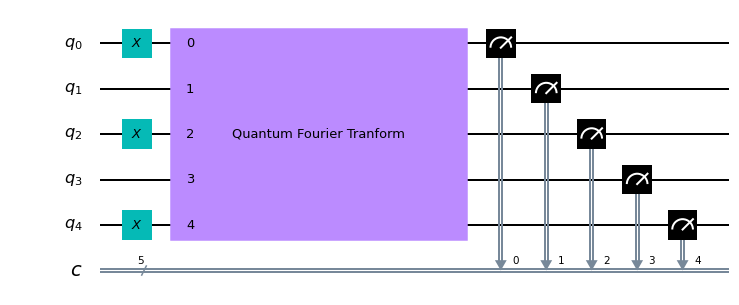

In [21]:
n = 5
mc = QuantumCircuit(n, n)

#state |x> = |10101>
mc.x(0) 
mc.x(2)
mc.x(4)

#Computational basis state qsphere
backend = BasicAer.get_backend('statevector_simulator')
job0 = execute(mc, backend).result()

U = myQFT(n)
mc.append(U, range(n))

#Fourier basis state qsphere
job1 = execute(mc, backend).result()

mc.measure(range(n), range(n))

backend = BasicAer.get_backend('qasm_simulator')
atp = 1024
res = execute(mc, backend=backend, shots=atp).result()
ans = res.get_counts()

mc.draw('mpl')

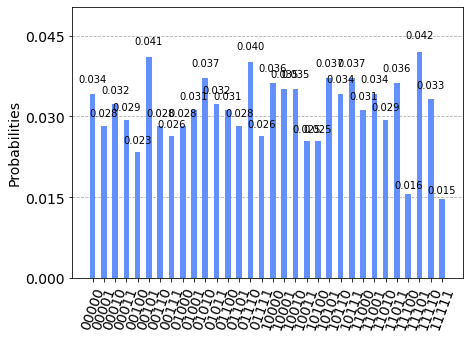

In [22]:
plot_histogram(ans)

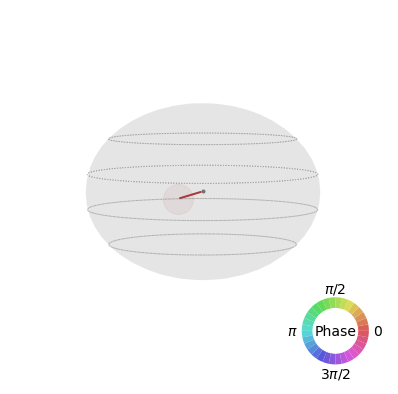

In [23]:
plot_state_qsphere(job0.get_statevector(mc))

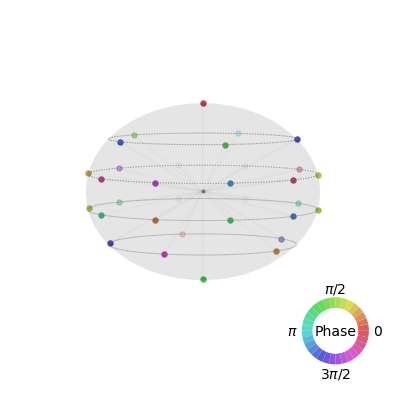

In [20]:
plot_state_qsphere(job1.get_statevector(mc))